<a href="https://colab.research.google.com/github/RifatRudro/Data-Science-Work/blob/main/Data_Mining_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Transformers and Tokenization
!pip install -q transformers
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Explainable AI Libraries
!pip install -q lime
from lime.lime_text import LimeTextExplainer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data with checks
import os

nltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')

if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

nltk.data.path.append(nltk_data_path)

required_packages = ['stopwords', 'wordnet', 'omw-1.4']

for package in required_packages:
    try:
        nltk.data.find(f'corpora/{package}')
    except LookupError:
        print(f'Downloading NLTK package: {package}')
        nltk.download(package, download_dir=nltk_data_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **Ensure Proper NLTK Data Download**

In [2]:
# Import necessary libraries
import nltk

# Download required NLTK data packages
nltk.download('wordnet')
nltk.download('omw-1.4')  # Necessary for WordNet lemmatizer
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Verify NLTK Data Path**

In [3]:
import os

# Define a directory to store NLTK data
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')

# Create the directory if it doesn't exist
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Add the directory to NLTK's data path
nltk.data.path.append(nltk_data_dir)

# Download required NLTK data packages to the specified directory
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)

[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data] Downloading package omw-1.4 to /content/nltk_data...
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Dataset Acquisition and Preprocessing**

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

# Display the first few rows
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# **Exploratory Data Analysis (EDA)**

Dataset contains 14640 rows and 15 columns.

Missing values in each column:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


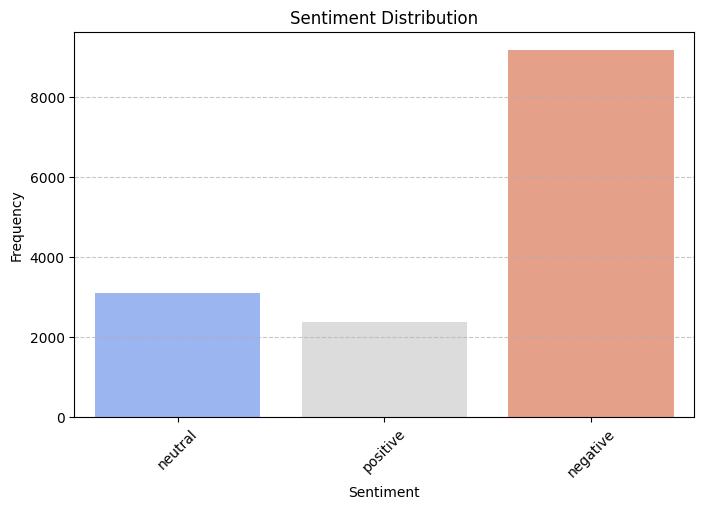

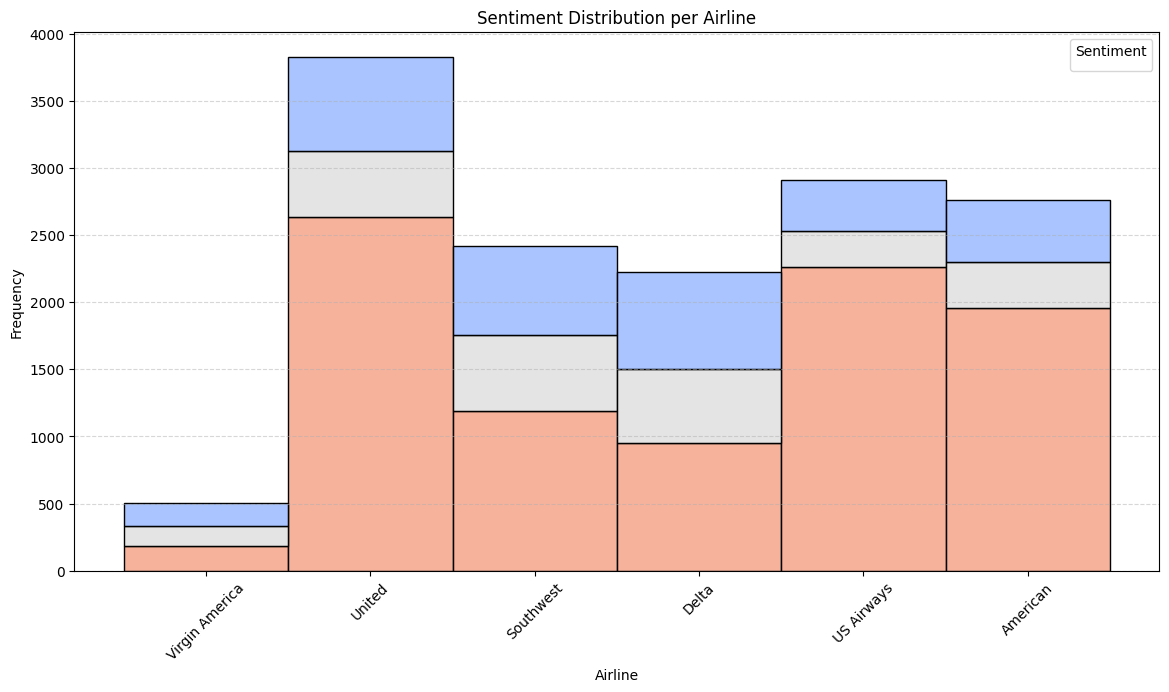

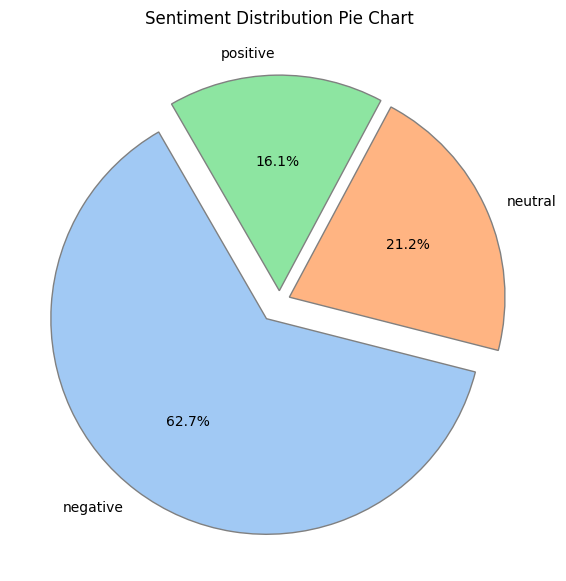

In [5]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Distribution of sentiments (enhanced with labels)
plt.figure(figsize=(8, 5))
sns.countplot(x='airline_sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution of sentiments per airline (stacked style for variety)
plt.figure(figsize=(14, 7))
sns.histplot(df, x='airline', hue='airline_sentiment', multiple="stack", palette='coolwarm')
plt.title('Sentiment Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Pie chart for sentiment distribution with a modified color scheme
plt.figure(figsize=(7, 7))
df['airline_sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel', 3),
    startangle=120,
    explode=[0.1, 0.05, 0.05],
    wedgeprops={'linewidth': 1, 'edgecolor': 'gray'}
)
plt.title('Sentiment Distribution Pie Chart')
plt.ylabel('')  # To remove the y-label
plt.show()


# **Data Preprocessing**

In [6]:
def preprocess_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\@\w+|\#','', text)

    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Display cleaned text
df[['text', 'clean_text']].head()

,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,didn today must mean need to take another trip
3,@VirginAmerica it's really aggressive to blast...,it really aggressive to blast obnoxious entert...
4,@VirginAmerica and it's a really big bad thing...,and it a really big bad thing about it


# **Feature Extraction**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and labels
X = df['clean_text']
y = df['airline_sentiment'].map({'negative':0, 'neutral':1, 'positive':2})  # Encoding sentiments

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit and transform the data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# **Model Training with BERT**

We'll utilize Hugging Face's transformers library to fine-tune a pre-trained BERT model for sentiment classification. BERT (Bidirectional Encoder Representations from Transformers) has achieved state-of-the-art results in various NLP tasks due to its deep bidirectional understanding of language.

# **1. Encoding Labels**

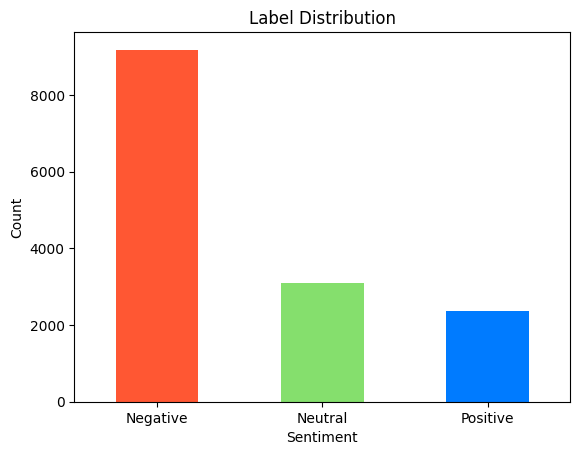

In [8]:
# Encode sentiments
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['airline_sentiment'].map(label_mapping)

# Display label distribution with custom colors
colors = ['#FF5733', '#85df6d', '#007BFF']  # Example colors: red, light green, and blue

df['label'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.title('Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()

# **2. Splitting the Dataset**

In [9]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = df['clean_text']
y = df['label']

# First split: 70% training, 30% temporary set
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: Split the 30% temporary set into 20% validation and 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

# Display sizes of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 10248
Validation set size: 2928
Testing set size: 1464


# **3. Tokenization**

In [10]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128
    )

# Tokenize training and testing data
train_encodings = tokenize_function(X_train)
test_encodings = tokenize_function(X_test)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# **4. Creating Dataset Objects**

In [11]:
import torch
from torch.utils.data import Dataset

class TweetsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create dataset objects
train_dataset = TweetsDataset(train_encodings, y_train.tolist())
test_dataset = TweetsDataset(test_encodings, y_test.tolist())

**# 5. Fine-Tuning BERT**

In [12]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Initialize the model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,  # Negative, Neutral, Positive
    output_attentions=False,
    output_hidden_states=False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=64,   # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

# Define a metric computation function
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.480000,0.466523,0.808060,0.807288,0.806612,0.808060
2,0.342600,0.480859,0.822404,0.823711,0.825396,0.822404
3,0.101800,0.708157,0.833333,0.832401,0.831795,0.833333


TrainOutput(global_step=1923, training_loss=0.37701642916993555, metrics={'train_runtime': 15972.5383, 'train_samples_per_second': 1.925, 'train_steps_per_second': 0.12, 'total_flos': 631965540205440.0, 'train_loss': 0.37701642916993555, 'epoch': 3.0})

**# 7. Evaluating the Model**

In [14]:
# Evaluate the model
trainer.evaluate()

{'eval_loss': 0.7081572413444519,
 'eval_accuracy': 0.8333333333333334,
 'eval_f1': 0.8324013208425861,
 'eval_precision': 0.8317945994584429,
 'eval_recall': 0.8333333333333334,
 'eval_runtime': 188.6579,
 'eval_samples_per_second': 7.76,
 'eval_steps_per_second': 0.122,
 'epoch': 3.0}

# **Model Evaluation**

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.90      0.90       918
     Neutral       0.70      0.66      0.68       310
    Positive       0.76      0.79      0.78       236

    accuracy                           0.83      1464
   macro avg       0.79      0.78      0.78      1464
weighted avg       0.83      0.83      0.83      1464



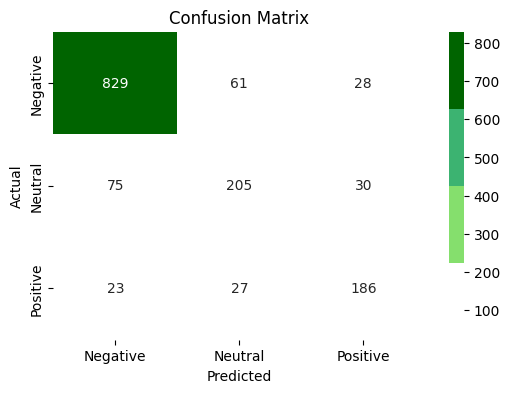

Accuracy: 83.33%


In [15]:
import matplotlib.colors as mcolors

# Predictions
predictions, true_labels, _ = trainer.predict(test_dataset)
preds = np.argmax(predictions, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, preds, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))

# Create a custom colormap
cmap = mcolors.ListedColormap(['#ffffff', '#85df6d', '#3cb371', '#006400'])  # White to light green to dark green

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

# **Explainable AI with LIME**

In [17]:
#Installing and Importing LIME
# Explainable AI Libraries
#!pip install lime
#from lime.lime_text import LimeTextExplainer

# **Preparing the Explainer**

In [16]:
from lime.lime_text import LimeTextExplainer

# Define class names
class_names = ['Negative', 'Neutral', 'Positive']

# Initialize LIME explainer
explainer = LimeTextExplainer(class_names=class_names)

# **Defining a Prediction Function**

In [18]:
def predict_proba(texts):
    # Tokenize the texts
    encodings = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )
    # Move tensors to the same device as the model
    encodings = {key: val.to(model.device) for key, val in encodings.items()}

    # Get logits from the model
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1).cpu().numpy()
    return probs

# **Explaining a Single Predictions**

In [ ]:
# Select a sample from the test set
sample_idx = 42  # You can change this index to explore different samples
sample_text = X_test.iloc[sample_idx]
actual_sentiment = y_test.iloc[sample_idx]
predicted_sentiment = preds[sample_idx]

print(f"Original Tweet: {df.iloc[X_test.index[sample_idx]]['text']}")
print(f"Cleaned Tweet: {sample_text}")
print(f"Actual Sentiment: {class_names[actual_sentiment]}")
print(f"Predicted Sentiment: {class_names[predicted_sentiment]}")

# Generate explanation
exp = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10,
    labels=[predicted_sentiment]
)

# Display the explanation
exp.show_in_notebook(text=True)

Original Tweet: @SouthwestAir you Cancelled Flightled my flight to BNA. I have flight from BNA 2 MDW tomorrow AM. You stranded me in DEN. I've been on hold all day
Cleaned Tweet: you cancelled flightled my flight to bna have flight from bna mdw tomorrow am you stranded me in den ve been on hold all day
Actual Sentiment: Negative
Predicted Sentiment: Negative


# **Explaining Multiple Predictions**

In [ ]:
# Function to display explanations for multiple samples
def display_lime_explanations(texts, labels, preds, num_samples=3):
    for i in range(num_samples):
        idx = np.random.randint(0, len(texts))
        text = texts.iloc[idx]
        actual = labels.iloc[idx]
        pred = preds[idx]
        print(f"\nSample {i+1}")
        print(f"Original Tweet: {df.iloc[X_test.index[idx]]['text']}")
        print(f"Cleaned Tweet: {text}")
        print(f"Actual Sentiment: {class_names[actual]}")
        print(f"Predicted Sentiment: {class_names[pred]}")
        exp = explainer.explain_instance(
            text,
            predict_proba,
            num_features=10,
            labels=[pred]
        )
        exp.show_in_notebook(text=True)

# Display explanations for 5 random samples
display_lime_explanations(X_test, y_test, preds, num_samples=5)